<a href="https://colab.research.google.com/github/PrinceP/MonoRepo/blob/dl_learning/src/colabs/Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation in skimage for thresholding using sauvola technique.


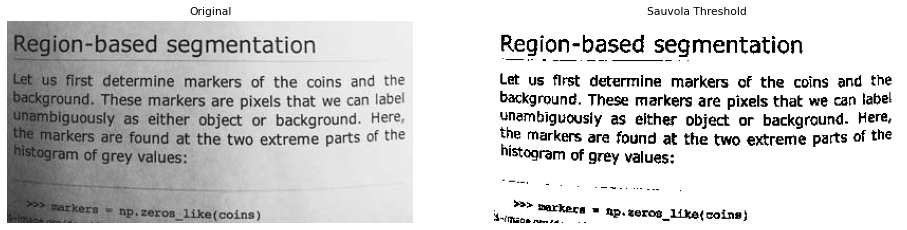

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.data import page
from skimage.filters import threshold_sauvola


matplotlib.rcParams['font.size'] = 9


image = page()

window_size = 25
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

# Implementation of above function

Using integral image as a helper function

https://nayan.co/blog/AI/Integral-Image/

In [ ]:
import cv2
import numpy as np
import bottleneck as bn

In [ ]:
def get_sauvola_threshold(m, s, k):
    R = np.amax(s)
    return m*(1 + k*(s/(R-1)))

In [ ]:
def binarize(img, window_size, k_factor):
    results = []
    
    # Normalize image pixels to [0..1] values
    img = img/255

    binary_mask = np.zeros(img.shape)

    w = window_size
    k = k_factor

    # Moving window average and standard deviation
    m = bn.move_mean(img, window=int(w), min_count=1)
    s = bn.move_std(img, window=int(w), min_count=1)

    T = get_sauvola_threshold(m,s,k)

    binary_mask = np.where(img<T, 0.0, 1.0)
    return binary_mask


In [ ]:
from skimage import img_as_ubyte

cv_image = img_as_ubyte(image)

binary_cv_image = binarize(cv_image, window_size=window_size, k_factor=0.2)


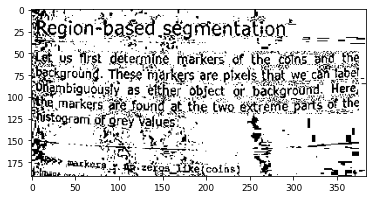

In [ ]:
plt.imshow(binary_cv_image, cmap=plt.cm.gray)